In [7]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [5]:
model = ChatGoogleGenerativeAI(model='gemini-2.5-pro')

In [6]:
#create state

class LLMState(TypedDict):

    question: str
    answer: str

In [11]:
def llm_qa(state: LLMState)->LLMState:
    #extract the question from state 
    question = state['question']

    #form a prompt
    prompt = f'answer the following {question}'

    #ask that question to LLM
    answer = model.invoke(prompt).content

    #update the answer in the state 
    state['answer'] = answer

    return state

In [13]:
#create our graph
graph = StateGraph(LLMState)

#add node
graph.add_node('llm_qa',llm_qa)

#add edges
graph.add_edge(START,'llm_qa')
graph.add_edge('llm_qa',END)

#compile
workflow = graph.compile()

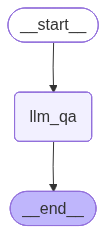

In [14]:
#to visualize the  updated graph use 
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [16]:
#execute
intial_state = {'question': 'How far is the moon from earth?'}
final_state = workflow.invoke(intial_state)
print(final_state['answer'])

Of course! Here is the answer, broken down from a simple summary to more detailed information.

### The Simple Answer

The **average distance** from the Earth to the Moon is about **238,855 miles (384,400 kilometers)**.

You could fit about 30 Earth-sized planets in the space between the Earth and the Moon.

---

### The Detailed Answer

The distance is not constant because the Moon's orbit around the Earth is not a perfect circle; it's an ellipse (an oval shape). This means the distance varies throughout its orbit.

Here are the key distances:

*   **Perigee (Closest Point):** The Moon is about **226,000 miles (363,300 km)** away from Earth. When a full moon occurs at this point, it is often called a "Supermoon" because it appears slightly larger and brighter in the sky.

*   **Apogee (Farthest Point):** The Moon is about **252,000 miles (405,500 km)** away from Earth. A full moon at this point is sometimes called a "Micromoon."

### Fun Fact: The Moon is Moving Away!

The Moon is slo